In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden


(1, 256)
(1, 200)
(256, 200)


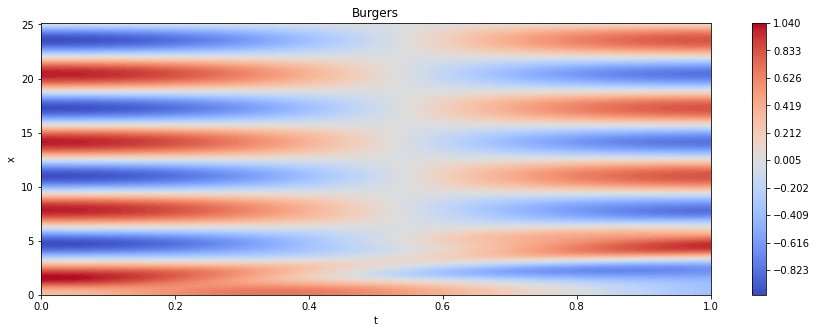

In [3]:
# Load the .mat file
mat_data = scipy.io.loadmat('EB_winkler.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [4]:
x1 = x.T
t1 = t.T

In [5]:
# Broadcasting to create the u_exact tensor with shape (100, 256)
u_exact = np.sin(x1)[:, np.newaxis] * np.cos(np.pi * t1)

# Now, u_exact will have the shape (100, 256)

u_exact = u_exact.T
u_exact = torch.tensor(u_exact)
u_exact = torch.squeeze(u_exact)
u_exact.shape

torch.Size([200, 256])

In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 199
batch_size = 1
num_epochs = 20000

# Set random seed for reproducibility
torch.manual_seed(42)
u.shape

(256, 200)

In [7]:
input_data = u[:, 0:199]
target_data = u[:, 1:200]

test_data = u[ :, 0]
#test_target = u[:,80:100]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)


test data shape (256,)
input data shape (256, 199)
Target data shape (256, 199)
input tensor shape torch.Size([1, 199, 256])
Target tensor shape torch.Size([1, 199, 256])


In [8]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()
print(test_tensor.shape)

torch.Size([1, 1, 256])


In [9]:
# Create RNN instance
rnn = RNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = rnn(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.9f}')


Epoch: 10/20000, Loss: 0.033579417
Epoch: 20/20000, Loss: 0.018058896
Epoch: 30/20000, Loss: 0.007522901
Epoch: 40/20000, Loss: 0.004009506
Epoch: 50/20000, Loss: 0.002391190
Epoch: 60/20000, Loss: 0.001636212
Epoch: 70/20000, Loss: 0.001153077
Epoch: 80/20000, Loss: 0.000881040
Epoch: 90/20000, Loss: 0.000688239
Epoch: 100/20000, Loss: 0.001668488
Epoch: 110/20000, Loss: 0.000535868
Epoch: 120/20000, Loss: 0.000490879
Epoch: 130/20000, Loss: 0.000315151
Epoch: 140/20000, Loss: 0.000261785
Epoch: 150/20000, Loss: 0.000222584
Epoch: 160/20000, Loss: 0.000200073
Epoch: 170/20000, Loss: 0.000180193
Epoch: 180/20000, Loss: 0.000164083
Epoch: 190/20000, Loss: 0.000150926
Epoch: 200/20000, Loss: 0.000139323
Epoch: 210/20000, Loss: 0.000129226
Epoch: 220/20000, Loss: 0.000120369
Epoch: 230/20000, Loss: 0.000112603
Epoch: 240/20000, Loss: 0.000105785
Epoch: 250/20000, Loss: 0.000102242
Epoch: 260/20000, Loss: 0.003426983
Epoch: 270/20000, Loss: 0.000631916
Epoch: 280/20000, Loss: 0.000286262
E

Epoch: 2270/20000, Loss: 0.000067492
Epoch: 2280/20000, Loss: 0.000023129
Epoch: 2290/20000, Loss: 0.000012777
Epoch: 2300/20000, Loss: 0.000008488
Epoch: 2310/20000, Loss: 0.000006162
Epoch: 2320/20000, Loss: 0.000005148
Epoch: 2330/20000, Loss: 0.000004691
Epoch: 2340/20000, Loss: 0.000004592
Epoch: 2350/20000, Loss: 0.000004999
Epoch: 2360/20000, Loss: 0.000042772
Epoch: 2370/20000, Loss: 0.000249606
Epoch: 2380/20000, Loss: 0.000233551
Epoch: 2390/20000, Loss: 0.000065258
Epoch: 2400/20000, Loss: 0.000021957
Epoch: 2410/20000, Loss: 0.000012335
Epoch: 2420/20000, Loss: 0.000006933
Epoch: 2430/20000, Loss: 0.000005751
Epoch: 2440/20000, Loss: 0.000013423
Epoch: 2450/20000, Loss: 0.000053191
Epoch: 2460/20000, Loss: 0.000098683
Epoch: 2470/20000, Loss: 0.000020471
Epoch: 2480/20000, Loss: 0.000010728
Epoch: 2490/20000, Loss: 0.000005305
Epoch: 2500/20000, Loss: 0.000005360
Epoch: 2510/20000, Loss: 0.000028148
Epoch: 2520/20000, Loss: 0.000076257
Epoch: 2530/20000, Loss: 0.000028517
E

Epoch: 4500/20000, Loss: 0.001142158
Epoch: 4510/20000, Loss: 0.000578010
Epoch: 4520/20000, Loss: 0.000359036
Epoch: 4530/20000, Loss: 0.000256515
Epoch: 4540/20000, Loss: 0.000201321
Epoch: 4550/20000, Loss: 0.000167711
Epoch: 4560/20000, Loss: 0.000144365
Epoch: 4570/20000, Loss: 0.000126697
Epoch: 4580/20000, Loss: 0.000112790
Epoch: 4590/20000, Loss: 0.000101449
Epoch: 4600/20000, Loss: 0.000091942
Epoch: 4610/20000, Loss: 0.000083854
Epoch: 4620/20000, Loss: 0.000076877
Epoch: 4630/20000, Loss: 0.000070797
Epoch: 4640/20000, Loss: 0.000065459
Epoch: 4650/20000, Loss: 0.000060742
Epoch: 4660/20000, Loss: 0.000056555
Epoch: 4670/20000, Loss: 0.000052825
Epoch: 4680/20000, Loss: 0.000049490
Epoch: 4690/20000, Loss: 0.000046501
Epoch: 4700/20000, Loss: 0.000043814
Epoch: 4710/20000, Loss: 0.000041393
Epoch: 4720/20000, Loss: 0.000039207
Epoch: 4730/20000, Loss: 0.000037226
Epoch: 4740/20000, Loss: 0.000035429
Epoch: 4750/20000, Loss: 0.000033792
Epoch: 4760/20000, Loss: 0.000032299
E

Epoch: 6730/20000, Loss: 0.000025720
Epoch: 6740/20000, Loss: 0.000016427
Epoch: 6750/20000, Loss: 0.000010972
Epoch: 6760/20000, Loss: 0.000007012
Epoch: 6770/20000, Loss: 0.000005364
Epoch: 6780/20000, Loss: 0.000005395
Epoch: 6790/20000, Loss: 0.000005759
Epoch: 6800/20000, Loss: 0.000006001
Epoch: 6810/20000, Loss: 0.000005365
Epoch: 6820/20000, Loss: 0.000005128
Epoch: 6830/20000, Loss: 0.000005051
Epoch: 6840/20000, Loss: 0.000005014
Epoch: 6850/20000, Loss: 0.000004980
Epoch: 6860/20000, Loss: 0.000004944
Epoch: 6870/20000, Loss: 0.000004913
Epoch: 6880/20000, Loss: 0.000004885
Epoch: 6890/20000, Loss: 0.000004859
Epoch: 6900/20000, Loss: 0.000004841
Epoch: 6910/20000, Loss: 0.000005012
Epoch: 6920/20000, Loss: 0.000007233
Epoch: 6930/20000, Loss: 0.000006086
Epoch: 6940/20000, Loss: 0.000039160
Epoch: 6950/20000, Loss: 0.000663188
Epoch: 6960/20000, Loss: 0.000047721
Epoch: 6970/20000, Loss: 0.000081338
Epoch: 6980/20000, Loss: 0.000009616
Epoch: 6990/20000, Loss: 0.000014987
E

Epoch: 8970/20000, Loss: 0.000005979
Epoch: 8980/20000, Loss: 0.000030945
Epoch: 8990/20000, Loss: 0.001058340
Epoch: 9000/20000, Loss: 0.000238732
Epoch: 9010/20000, Loss: 0.000046712
Epoch: 9020/20000, Loss: 0.000037882
Epoch: 9030/20000, Loss: 0.000006283
Epoch: 9040/20000, Loss: 0.000004580
Epoch: 9050/20000, Loss: 0.000004062
Epoch: 9060/20000, Loss: 0.000003146
Epoch: 9070/20000, Loss: 0.000002763
Epoch: 9080/20000, Loss: 0.000002573
Epoch: 9090/20000, Loss: 0.000002495
Epoch: 9100/20000, Loss: 0.000002483
Epoch: 9110/20000, Loss: 0.000002447
Epoch: 9120/20000, Loss: 0.000002425
Epoch: 9130/20000, Loss: 0.000002410
Epoch: 9140/20000, Loss: 0.000002473
Epoch: 9150/20000, Loss: 0.000008987
Epoch: 9160/20000, Loss: 0.000791549
Epoch: 9170/20000, Loss: 0.000637735
Epoch: 9180/20000, Loss: 0.000041021
Epoch: 9190/20000, Loss: 0.000040486
Epoch: 9200/20000, Loss: 0.000027305
Epoch: 9210/20000, Loss: 0.000004048
Epoch: 9220/20000, Loss: 0.000005861
Epoch: 9230/20000, Loss: 0.000002753
E

Epoch: 11160/20000, Loss: 0.000190031
Epoch: 11170/20000, Loss: 0.000152659
Epoch: 11180/20000, Loss: 0.000021485
Epoch: 11190/20000, Loss: 0.000021812
Epoch: 11200/20000, Loss: 0.000003834
Epoch: 11210/20000, Loss: 0.000004428
Epoch: 11220/20000, Loss: 0.000002552
Epoch: 11230/20000, Loss: 0.000001775
Epoch: 11240/20000, Loss: 0.000001607
Epoch: 11250/20000, Loss: 0.000001546
Epoch: 11260/20000, Loss: 0.000001509
Epoch: 11270/20000, Loss: 0.000001465
Epoch: 11280/20000, Loss: 0.000001438
Epoch: 11290/20000, Loss: 0.000001413
Epoch: 11300/20000, Loss: 0.000001522
Epoch: 11310/20000, Loss: 0.000006958
Epoch: 11320/20000, Loss: 0.000032172
Epoch: 11330/20000, Loss: 0.000910962
Epoch: 11340/20000, Loss: 0.000227662
Epoch: 11350/20000, Loss: 0.000066057
Epoch: 11360/20000, Loss: 0.000027955
Epoch: 11370/20000, Loss: 0.000006003
Epoch: 11380/20000, Loss: 0.000004431
Epoch: 11390/20000, Loss: 0.000003193
Epoch: 11400/20000, Loss: 0.000002159
Epoch: 11410/20000, Loss: 0.000001733
Epoch: 11420

Epoch: 13320/20000, Loss: 0.000001508
Epoch: 13330/20000, Loss: 0.000004566
Epoch: 13340/20000, Loss: 0.000005447
Epoch: 13350/20000, Loss: 0.000021676
Epoch: 13360/20000, Loss: 0.000192069
Epoch: 13370/20000, Loss: 0.000123956
Epoch: 13380/20000, Loss: 0.000091483
Epoch: 13390/20000, Loss: 0.000023845
Epoch: 13400/20000, Loss: 0.000008080
Epoch: 13410/20000, Loss: 0.000004419
Epoch: 13420/20000, Loss: 0.000010457
Epoch: 13430/20000, Loss: 0.000075018
Epoch: 13440/20000, Loss: 0.000120164
Epoch: 13450/20000, Loss: 0.000053346
Epoch: 13460/20000, Loss: 0.000002736
Epoch: 13470/20000, Loss: 0.000014904
Epoch: 13480/20000, Loss: 0.000008809
Epoch: 13490/20000, Loss: 0.000012768
Epoch: 13500/20000, Loss: 0.000016298
Epoch: 13510/20000, Loss: 0.000116335
Epoch: 13520/20000, Loss: 0.000176861
Epoch: 13530/20000, Loss: 0.000103652
Epoch: 13540/20000, Loss: 0.000031930
Epoch: 13550/20000, Loss: 0.000007942
Epoch: 13560/20000, Loss: 0.000004689
Epoch: 13570/20000, Loss: 0.000005129
Epoch: 13580

Epoch: 15490/20000, Loss: 0.000002740
Epoch: 15500/20000, Loss: 0.000001541
Epoch: 15510/20000, Loss: 0.000001330
Epoch: 15520/20000, Loss: 0.000001256
Epoch: 15530/20000, Loss: 0.000001165
Epoch: 15540/20000, Loss: 0.000001118
Epoch: 15550/20000, Loss: 0.000001080
Epoch: 15560/20000, Loss: 0.000001120
Epoch: 15570/20000, Loss: 0.000002529
Epoch: 15580/20000, Loss: 0.000068345
Epoch: 15590/20000, Loss: 0.000101047
Epoch: 15600/20000, Loss: 0.000049365
Epoch: 15610/20000, Loss: 0.000178792
Epoch: 15620/20000, Loss: 0.000039791
Epoch: 15630/20000, Loss: 0.000018073
Epoch: 15640/20000, Loss: 0.000015802
Epoch: 15650/20000, Loss: 0.000138536
Epoch: 15660/20000, Loss: 0.000008397
Epoch: 15670/20000, Loss: 0.000022169
Epoch: 15680/20000, Loss: 0.000011941
Epoch: 15690/20000, Loss: 0.000006119
Epoch: 15700/20000, Loss: 0.000002632
Epoch: 15710/20000, Loss: 0.000001493
Epoch: 15720/20000, Loss: 0.000000960
Epoch: 15730/20000, Loss: 0.000000996
Epoch: 15740/20000, Loss: 0.000000849
Epoch: 15750

Epoch: 17670/20000, Loss: 0.000008140
Epoch: 17680/20000, Loss: 0.000016664
Epoch: 17690/20000, Loss: 0.000031190
Epoch: 17700/20000, Loss: 0.000015185
Epoch: 17710/20000, Loss: 0.000011830
Epoch: 17720/20000, Loss: 0.000009336
Epoch: 17730/20000, Loss: 0.000008290
Epoch: 17740/20000, Loss: 0.000007350
Epoch: 17750/20000, Loss: 0.000007472
Epoch: 17760/20000, Loss: 0.000007163
Epoch: 17770/20000, Loss: 0.000007035
Epoch: 17780/20000, Loss: 0.000006917
Epoch: 17790/20000, Loss: 0.000006813
Epoch: 17800/20000, Loss: 0.000006729
Epoch: 17810/20000, Loss: 0.000006809
Epoch: 17820/20000, Loss: 0.000014732
Epoch: 17830/20000, Loss: 0.000054829
Epoch: 17840/20000, Loss: 0.000006780
Epoch: 17850/20000, Loss: 0.000014884
Epoch: 17860/20000, Loss: 0.000007167
Epoch: 17870/20000, Loss: 0.000006559
Epoch: 17880/20000, Loss: 0.000006631
Epoch: 17890/20000, Loss: 0.000006736
Epoch: 17900/20000, Loss: 0.000006073
Epoch: 17910/20000, Loss: 0.000005994
Epoch: 17920/20000, Loss: 0.000007085
Epoch: 17930

Epoch: 19850/20000, Loss: 0.000194909
Epoch: 19860/20000, Loss: 0.000079201
Epoch: 19870/20000, Loss: 0.000015699
Epoch: 19880/20000, Loss: 0.000008155
Epoch: 19890/20000, Loss: 0.000005738
Epoch: 19900/20000, Loss: 0.000004652
Epoch: 19910/20000, Loss: 0.000001525
Epoch: 19920/20000, Loss: 0.000002343
Epoch: 19930/20000, Loss: 0.000003653
Epoch: 19940/20000, Loss: 0.000003971
Epoch: 19950/20000, Loss: 0.000046927
Epoch: 19960/20000, Loss: 0.000422143
Epoch: 19970/20000, Loss: 0.000174687
Epoch: 19980/20000, Loss: 0.000057915
Epoch: 19990/20000, Loss: 0.000015395
Epoch: 20000/20000, Loss: 0.000002678


In [10]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 200, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 200, 256])


In [11]:
# with torch.no_grad():
#     hidden_pred = torch.zeros(1, batch_size, hidden_size)
#     prediction, _ = rnn(test_tensor, hidden_pred)
#     prediction = prediction.view(1, 1, 256).float()
#     prediction_tensor[:, 0, :] = prediction
#     for i in range(199):
#         hidden_pred = torch.zeros(1, batch_size, hidden_size)
#         prediction, _ = rnn(prediction, hidden_pred)
#         prediction = prediction.view(1, 1, 256).float()
#         prediction_tensor[:, i+1, :] = prediction

In [12]:
hidden_pred = torch.zeros(1, batch_size, hidden_size)
prediction_full, _ = rnn(input_tensor, hidden_pred)

In [13]:
prediction_full.shape
prediction_full = torch.squeeze(prediction_full)
print(prediction_full.shape)

torch.Size([199, 256])


In [14]:
prediction_full.shape

torch.Size([199, 256])

In [15]:

u_test = u_exact
u_test_full = u_test[0:199, :]

In [16]:
k1 = ( prediction_full - u_test_full)**2
u_test_full_tensor = u_test_full**2
u_test_full_tensor.shape

torch.Size([199, 256])

In [17]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.05777695423205904 %


In [18]:
2+

SyntaxError: invalid syntax (4209523232.py, line 1)

In [ ]:
prediction_tensor.shape
prediction_tensor = torch.squeeze(prediction_tensor)
print(prediction_tensor.shape)

In [ ]:
# Exact Solution

u_test = u_exact
u_test_full = u_test[0:200, :]

In [ ]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = u_test_full**2
u_test_full_tensor.shape

In [ ]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

In [ ]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))
print(R_abs)

In [ ]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors


# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

In [ ]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")


In [ ]:
x1 = np.linspace(0, np.pi, 256)
t1 = np.linspace(0, 1, 99)

conc_u = torch.squeeze(input_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(0, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x1, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_RNN_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


In [ ]:
x = np.linspace(0, np.pi, 256)
t = np.linspace(0, 1, 100)
t[-2]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.98}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-0.5, 1.5, 3.5])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.98_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[83, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.83}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-0.5, 1.5, 3.5])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.83_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
